In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sys.path.append(os.path.join(os.path.dirname(os.getcwd())))
from flow import Paths
from sim import signal
Folder, _, _, Subjects = Paths.ExpData(fig_subfolder = 'sim_fmri')

## RSA simulation 

We first simulate sequence representations as based on the positional model described here

    sim_rep_positional.ipynb

Next we use two subjects from the study's pilot scans to derive two fMRI noise estimates (two sets of parameter values). and combine the fMRI noise with simulated sequence representations. See the following notebook for details:

    sim_fmri_noise.ipynb

We then compute the Spearman's rank correlation coefficient between the stimulus RDM and simulated voxel RDM. We measure how this value (Spearman's r) changes as we manipulate the following parameters:
1. $\sigma$ (sigma) -- amount of noise in sequence representations
2. Signal and fMRI noise scaling magnitude -- see notebooks_rev/sim_fmri_noise.ipynb for details
3. Signal scaling method -- the procedure used to calculate the signal magnitude, based on Welvaert & Rosseel (2013):
 - 'CNR_Amp/Noise-SD': Signal magnitude relative to the temporal noise
 - 'SFNR': Change proportional to the temporal variability, as represented by the SFNR
 
For exact implementation details see

    sim/signal.py

In [ ]:
N = pd.DataFrame(columns=['Subject', 'coef', 'Sigma', 'Scaling_Mag', 'Scaling_Met'])

Subjects = ['03', '07'] # pilot subjects
Sigma = [0.4, 0.8, 1.2, 1.6, 2]
Scaling_Mag = [0.15, 0.2, 0.3, 0.5]
Scaling_Met = ['CNR_Amp/Noise-SD', 'SFNR']

i = 0
for Subject in Subjects:
    for sigma in Sigma:
        for scaling_magnitude in Scaling_Mag:
            for scaling_method in Scaling_Met:
                c = signal.main(
                    Subject = Subject, 
                    scaling_magnitude = scaling_magnitude, 
                    scaling_method = scaling_method, 
                    sigma = sigma
                )
                N.loc[i] = [Subject, c, sigma, scaling_magnitude, scaling_method]
                i = i + 1

/imaging/local/software/anaconda/2.4.1/2/envs/p36/lib/python3.6/site-packages/seaborn/axisgrid.py:848: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  self.fig.tight_layout()


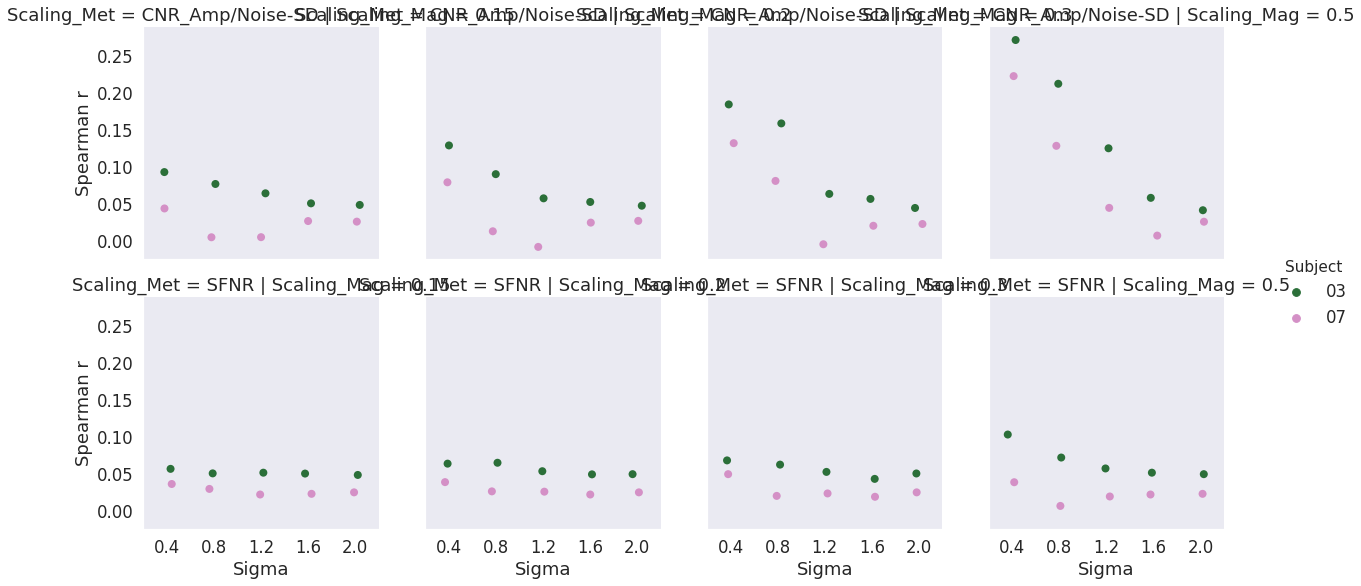

In [19]:
# plot
ax = sns.catplot(data=N, x='Sigma', y='coef', hue='Subject', col='Scaling_Mag', row='Scaling_Met',  
                 palette=sns.color_palette("cubehelix", 2), kind='strip', height=4, s=8);
ax.set_ylabels('Spearman r');

### Results

Representational noise modulation effect in RSA is most clearly evident with CNR_Amp/Noise-SD method: already detectable at 0.15 scaling magnitude. For SNFR the scaling magnitude has to be ca 0.5 for the effect to be visually detectable. In sum, noise modulation at the level of sequence representations is detectable with fMRI RSA.

In [ ]:
# plotting defaults
sns.set_style("dark");
sns.despine();
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5});
cmap = sns.color_palette("PuBuGn_d");
_figsize = (4,4);
_scale = 0.55
ext = '.pdf'

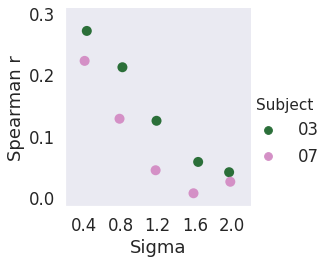

In [20]:
M = N[(N['Scaling_Met']=='CNR_Amp/Noise-SD') & (N['Scaling_Mag']==0.50)]
ax = sns.catplot(data=M, x='Sigma', y='coef', hue='Subject',
                 palette=sns.color_palette("cubehelix", 2),
                 kind='strip', height=4, s=10);
ax.set_ylabels('Spearman r');
ax.savefig(os.path.join(Folder['Fig'], 'snr' + ext))